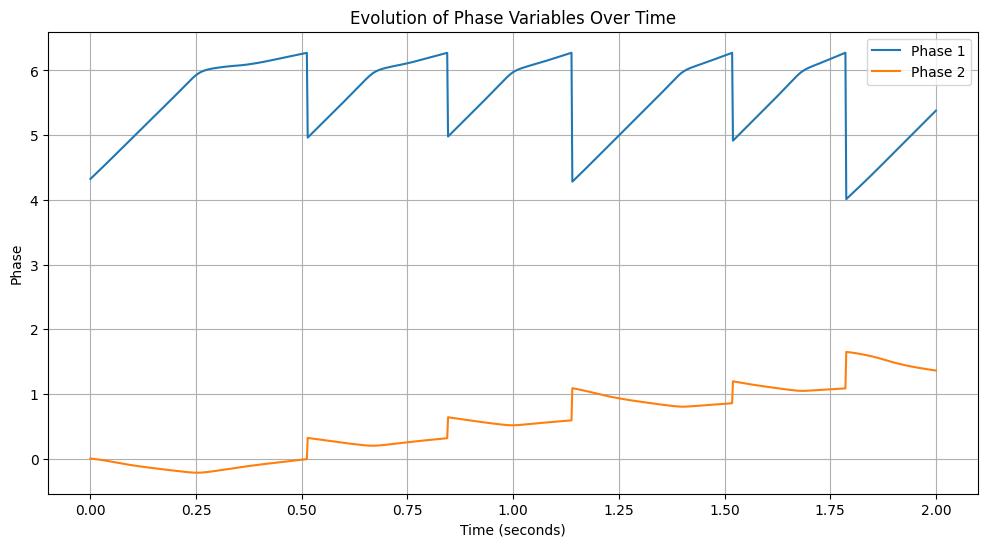

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('../../data/emergent_test_one_cilium/20250303/ciliate_1fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
                   delimiter=' ', 
                   header=None)

# Convert index to time (500 indices = 1 second)
time = data[0] / 500

# Plot both phase variables
plt.figure(figsize=(12, 6))
plt.plot(time, data[2], label='Phase 1')
plt.plot(time, data[3], label='Phase 2')
plt.xlabel('Time (seconds)')
plt.ylabel('Phase')
plt.title('Evolution of Phase Variables Over Time')
plt.legend()
plt.grid(True)
plt.show()

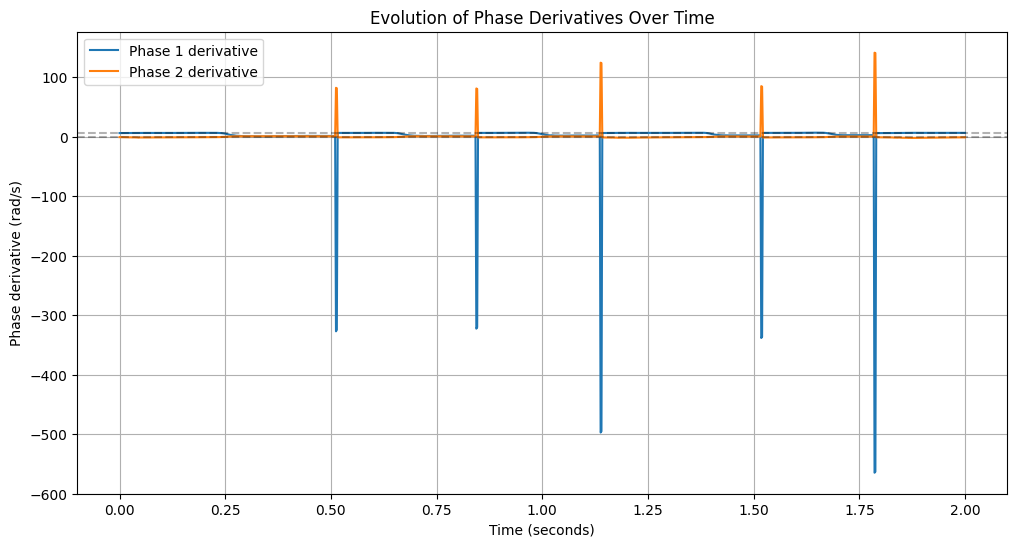

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data
data = pd.read_csv('../../data/emergent_test_one_cilium/20250303/ciliate_1fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
                   delimiter=' ', 
                   header=None)

# Convert index to time (500 indices = 1 second)
time = data[0] / 500

# Calculate derivatives (multiply by 500 to get per-second rate)
d_phase1 = np.gradient(data[2], time)
d_phase2 = np.gradient(data[3], time)

# Plot derivatives of phase variables
plt.figure(figsize=(12, 6))
plt.plot(time, d_phase1, label='Phase 1 derivative')
plt.plot(time, d_phase2, label='Phase 2 derivative')

# Add horizontal lines at 0 and 2π
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.axhline(y=2*np.pi, color='k', linestyle='--', alpha=0.3)

plt.xlabel('Time (seconds)')
plt.ylabel('Phase derivative (rad/s)')
plt.title('Evolution of Phase Derivatives Over Time')
plt.legend()
plt.grid(True)
plt.show()

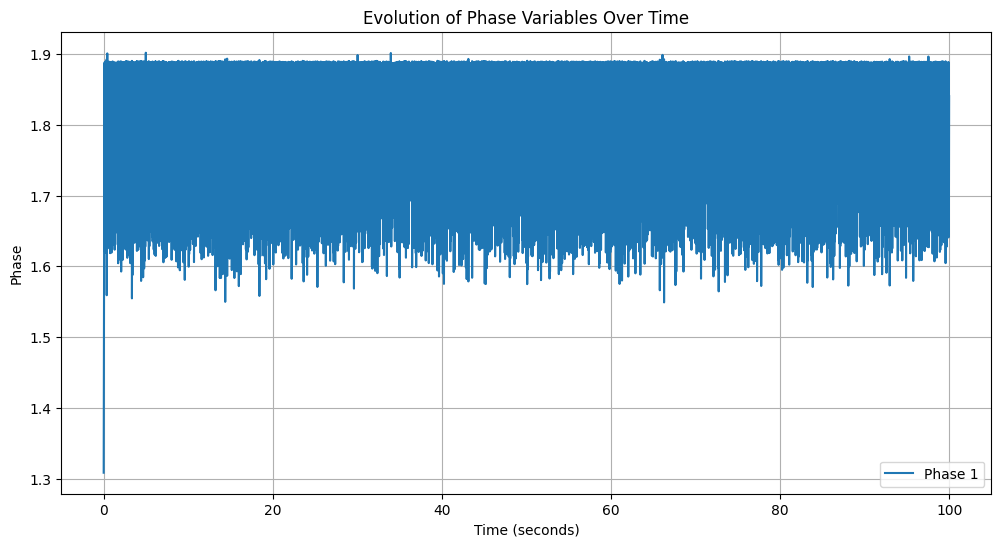

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv('../../data/emergent_test_new_gmres_no_elas/20250314/ciliate_4fil_9000blob_8.00R_0.0010torsion_0.2182tilt_0.3000f_eff_1.4960theta0_0.0000freqshift_true_states.dat', 
                   delimiter=' ', 
                   header=None)

# Convert index to time (500 indices = 1 second)
time = data[0] / 300

# Plot both phase variables
plt.figure(figsize=(12, 6))
plt.plot(time, data[5], label='Phase 1')
# plt.plot(time, data[3], label='Phase 2')
plt.xlabel('Time (seconds)')
plt.ylabel('Phase')
plt.title('Evolution of Phase Variables Over Time')
plt.legend()
plt.grid(True)
plt.show()